In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

import pickle

In [48]:
df_stores= pd.read_csv('stores data-set.csv')
df_sales = pd.read_csv('sales data-set.csv')
df_features = pd.read_csv('features data set.csv')

In [49]:
df_stores.info('stores data-set.csv') #данные о магазинах
df_sales.info('sales data-set.csv') #данные о продажах
df_features = pd.read_csv('features data set.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [51]:
# объединяем файлы
data = pd.merge(df_features, df_sales[["Date" , "Store" , "Weekly_Sales" , "Dept"]] ,on=['Date', 'Store'])
data = pd.merge(data , df_stores , on = "Store")
data.sort_values(["Date" , "Store"])
data.sort_values(["Date" , "Store"])

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Dept,Type,Size
4306,1,01/04/2011,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,20398.09,1,A,151315
4307,1,01/04/2011,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,46991.58,2,A,151315
4308,1,01/04/2011,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,8734.19,3,A,151315
4309,1,01/04/2011,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,34451.90,4,A,151315
4310,1,01/04/2011,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,23598.55,5,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415150,45,31/12/2010,29.67,3.179,NaN,NaN,NaN,NaN,NaN,182.571448,8.724,True,2072.46,93,B,118221
415151,45,31/12/2010,29.67,3.179,NaN,NaN,NaN,NaN,NaN,182.571448,8.724,True,3966.80,94,B,118221
415152,45,31/12/2010,29.67,3.179,NaN,NaN,NaN,NaN,NaN,182.571448,8.724,True,43149.88,95,B,118221
415153,45,31/12/2010,29.67,3.179,NaN,NaN,NaN,NaN,NaN,182.571448,8.724,True,5881.22,97,B,118221


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Weekly_Sales  421570 non-null  float64
 13  Dept          421570 non-null  int64  
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [57]:
data = data.drop(columns = ['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Type'],axis = 1)

In [53]:
#преобразуем значения True/False в 1/0
holidays_factor, types =data['IsHoliday'].factorize()
data['IsHoliday'] = holidays_factor

In [54]:
#преобразуем числа с плавающей запятой в целое число
data[['Temperature', 'CPI', 'Unemployment', 'Weekly_Sales', 'Fuel_Price']] = data[['Temperature', 'CPI', 'Unemployment', 'Weekly_Sales', 'Fuel_Price']].astype (int)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  int32  
 3   Fuel_Price    421570 non-null  int32  
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  int32  
 10  Unemployment  421570 non-null  int32  
 11  IsHoliday     421570 non-null  int64  
 12  Weekly_Sales  421570 non-null  int32  
 13  Dept          421570 non-null  int64  
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: float64(5), int32(5), int64(4), object(2)
memory usage: 46.6+ MB


Возьмем в качестве целевого признака 'IsHoliday' (о-не праздничный день/1-праздничный)

In [58]:
data

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Dept,Size
0,1,42,2,211,8,0,24924,1,151315
1,1,42,2,211,8,0,50605,2,151315
2,1,42,2,211,8,0,13740,3,151315
3,1,42,2,211,8,0,39954,4,151315
4,1,42,2,211,8,0,32229,5,151315
...,...,...,...,...,...,...,...,...,...
421565,45,58,3,192,8,0,2487,93,118221
421566,45,58,3,192,8,0,5203,94,118221
421567,45,58,3,192,8,0,56017,95,118221
421568,45,58,3,192,8,0,6817,97,118221


In [59]:
# Выясним является ли выборка сбалансированной.
mask_min = data['IsHoliday'] > 0
ratio = round(data[mask_min].shape[0] / data.shape[0] * 100, 2)
print(f'{ratio}% записей имеют значение целевой переменной отличное от 0 класса.')

7.04% записей имеют значение целевой переменной отличное от 0 класса.


In [60]:
data['IsHoliday'].value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

In [61]:
mask_maj = data['IsHoliday'] == 0
data_sample = pd.concat(
    [
        data[mask_maj].sample(data[mask_min].shape[0]),
        data[mask_min]
    ],
    ignore_index=True
)

data_sample['IsHoliday'].value_counts()

0    29661
1    29661
Name: IsHoliday, dtype: int64

In [62]:
X = data_sample.drop(['IsHoliday'], axis=1)
y = data_sample[['IsHoliday']]

# Разделяем выборку на тестовую и обучающую.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print('Размер обучающей выборки:', X_train.shape[0])
print('Размер тестовой выборки:', X_test.shape[0])

Размер обучающей выборки: 47457
Размер тестовой выборки: 11865


In [40]:
# Определим значение F1-метрики для случая случайного угадывания.
y_test_pred_rand = np.array([i % 4 for i in range(y_test.shape[0])])

print('F1 случайное угадывание:', f1_score(y_test, y_test_pred_rand, average='macro').round(3))

F1 случайное угадывание: 0.167


In [63]:
# Создадим объект класса логистическая регрессия.
log_reg = linear_model.LogisticRegression(
    multi_class='multinomial', 
    class_weight='balanced',
    random_state=42
)
# Обучаем модель.
log_reg.fit(X_train, y_train)

# Предсказание класса для обучающей и тестовой выборок.
y_test_pred_log_reg = log_reg.predict(X_test)
y_train_pred_log_reg = log_reg.predict(X_train)

print('F1 логистическая регрессия (train):', f1_score(y_train, y_train_pred_log_reg, average='macro').round(3))
print('F1 логистическая регрессия (test):', f1_score(y_test, y_test_pred_log_reg, average='macro').round(3))

F1 логистическая регрессия (train): 0.624
F1 логистическая регрессия (test): 0.616


In [64]:
# Создадим объект класса решающее дерево.
dec_tr = tree.DecisionTreeClassifier( 
    class_weight='balanced',
    random_state=42
)
# Обучаем модель.
dec_tr.fit(X_train, y_train)

# Предсказание класса для обучающей и тестовой выборок.
y_test_pred_dec_tr = dec_tr.predict(X_test)
y_train_pred_dec_tr = dec_tr.predict(X_train)

print('F1 решающие деревья (train):', f1_score(y_train, y_train_pred_dec_tr, average='macro').round(3))
print('F1 решающие деревья (test):', f1_score(y_test, y_test_pred_dec_tr, average='macro').round(3))

F1 решающие деревья (train): 1.0
F1 решающие деревья (test): 0.959


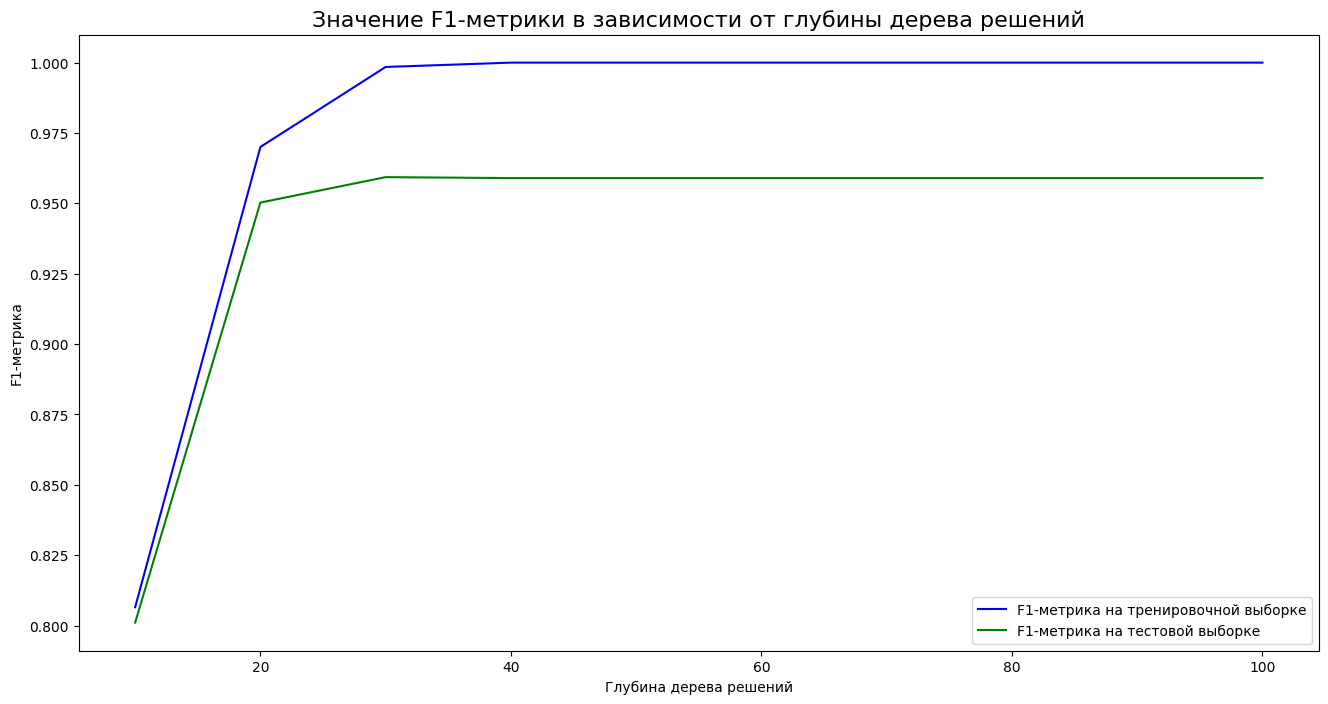

In [65]:
# Подберем оптимальную глубину дерева решений.
max_depths = range(10, 105, 10)
f1_train = []
f1_test = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(
        max_depth=max_depth,
        class_weight='balanced',
        random_state=42
    )
    dt.fit(X_train, y_train)
    y_train_pred_dt = dt.predict(X_train)
    y_test_pred_dt = dt.predict(X_test)
    f1_train.append(f1_score(y_train, y_train_pred_dt, average='macro'))
    f1_test.append(f1_score(y_test, y_test_pred_dt, average='macro'))
    
# Построим линейный графики изменения F1-метрики в зависимости от значения параметра глубины дерева решений
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(
    list(max_depths),
    f1_train,
    color='blue',
    label='F1-метрика на тренировочной выборке'
)

ax.plot(
    list(max_depths),
    f1_test,
    color='green',
    label='F1-метрика на тестовой выборке'
)
    
ax.set_title('Значение F1-метрики в зависимости от глубины дерева решений', fontsize=16)
ax.set_xlabel('Глубина дерева решений')
ax.set_ylabel('F1-метрика')
ax.legend();

In [66]:
# Создадим объект класса решающее дерево.
dtr_lim = tree.DecisionTreeClassifier( 
    max_depth=30,
    class_weight='balanced',
    random_state=42
)

# Обучаем модель.
dtr_lim.fit(X_train, y_train)

# Предсказание класса для обучающей и тестовой выборок.
y_test_pred_dtr_lim = dtr_lim.predict(X_test)
y_train_pred_dtr_lim = dtr_lim.predict(X_train)

print('F1 решающие деревья (train):', f1_score(y_train, y_train_pred_dtr_lim, average='macro').round(3))
print('F1 решающие деревья (test):', f1_score(y_test, y_test_pred_dtr_lim, average='macro').round(3))

F1 решающие деревья (train): 0.998
F1 решающие деревья (test): 0.959


Модель классификации на основании алгоритма k ближайших соседей с параметрами по умолчанию

In [67]:
# Создадим объект класса.
kn_cls = neighbors.KNeighborsClassifier(n_jobs = -1)

# Обучаем модель.
kn_cls.fit(X_train, y_train)

# Предсказание класса для обучающей и тестовой выборок.
y_test_pred_kn_cls = kn_cls.predict(X_test)
y_train_pred_kn_cls = kn_cls.predict(X_train)

print('F1 k ближайших соседей (train):', f1_score(y_train, y_train_pred_kn_cls, average='macro').round(3))
print('F1 k ближайших соседей (test):', f1_score(y_test, y_test_pred_kn_cls, average='macro').round(3))

F1 k ближайших соседей (train): 0.703
F1 k ближайших соседей (test): 0.515



Бэггинг

In [47]:
# Создадим объект класса случайный лес, в качестве гиперпараметров передадим 
# значения, полученные с помощью GridSearchCV.
rf_cls = ensemble.RandomForestClassifier(
    max_depth=30,
    min_samples_split=8,
    class_weight='balanced', 
    random_state=42
)

# Обучаем модель
rf_cls.fit(X_train, y_train)

# Предсказание класса для обучающей и тестовой выборок.
y_test_pred_rf_cls = rf_cls.predict(X_test)
y_train_pred_rf_cls = rf_cls.predict(X_train)

print('F1 случайный лес (train):', f1_score(y_train, y_train_pred_rf_cls, average='macro').round(3))
print('F1 случайный лес (test):', f1_score(y_test, y_test_pred_rf_cls, average='macro').round(3))

F1 случайный лес (train): 0.989
F1 случайный лес (test): 0.972


In [70]:
# Выведем ТОП-10 признаков по значимости.
feature_importances = (
    pd.Series(rf_cls.feature_importances_, index=X.columns)
    .sort_values(ascending=False)
    .head(10)
)
feature_importances

Temperature     0.505416
CPI             0.169867
Weekly_Sales    0.074524
Store           0.061270
Size            0.056507
Dept            0.050257
Unemployment    0.049057
Fuel_Price      0.033102
dtype: float64


Бустинг

In [71]:
# Реализуем алгоритм адаптивного бустинга.
# В качестве базовой модели будем использовать решющие деревья.
base_estimator= tree.DecisionTreeClassifier( 
    max_depth=30,
    class_weight='balanced',
    random_state=42
)

# Создадим объект класса AdaBoostClassifier.
ada_cls = ensemble.AdaBoostClassifier(
    base_estimator=base_estimator,
    learning_rate=0.0001,
    random_state=42, 
    n_estimators=50
)

# Обучаем модель
ada_cls.fit(X_train, y_train)

# Предсказание класса для обучающей и тестовой выборок.
y_test_pred_ada_cls = ada_cls.predict(X_test)
y_train_pred_ada_cls = ada_cls.predict(X_train)

print('F1 адаптивный бустинг (train):', f1_score(y_train, y_train_pred_ada_cls, average='macro').round(3))
print('F1 адаптивный бустинг (test):', f1_score(y_test, y_test_pred_ada_cls, average='macro').round(3))

F1 адаптивный бустинг (train): 0.999
F1 адаптивный бустинг (test): 0.959


In [76]:
print('Precision тестовая выборка:', precision_score(y_test, y_test_pred_dtr_lim, average='macro').round(3))
print('Recall тестовая выборка:', recall_score(y_test, y_test_pred_dtr_lim, average='macro').round(3))

Precision тестовая выборка: 0.959
Recall тестовая выборка: 0.959
